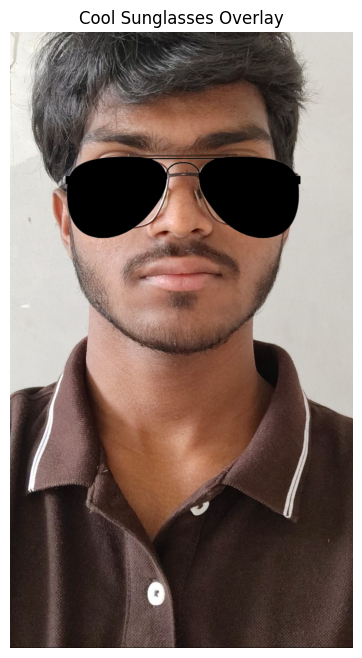

True

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Load your image
img = cv2.imread("click.jpg")  # Make sure this file exists in your folder

# Load sunglasses PNG (with transparent background)
sunglasses = cv2.imread("sunglass (2).png", cv2.IMREAD_UNCHANGED)

# Convert to grayscale for face detection
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 5)

scale_factor = 0.9  # reduce sunglasses size to 90% of face width

for (x, y, w, h) in faces:
    # Resize sunglasses to fit the face width (smaller)
    sung_w = int(w * scale_factor)
    scale = sung_w / sunglasses.shape[1]
    sung_h = int(sunglasses.shape[0] * scale)
    resized_sung = cv2.resize(sunglasses, (sung_w, sung_h))

    # Get ROI above the eyes (adjusted upward)
    y_offset = y + int(h/5)  # move sunglasses slightly higher
    x_offset = x + (w - sung_w)//2  # center sunglasses horizontally
    y1, y2 = y_offset, y_offset + resized_sung.shape[0]
    x1, x2 = x_offset, x_offset + resized_sung.shape[1]

    # Keep inside image boundaries
    y2 = min(y2, img.shape[0])
    x2 = min(x2, img.shape[1])

    # Overlay sunglasses
    if resized_sung.shape[2] == 4:
        sung_rgb = resized_sung[:, :, :3]
        sung_alpha = resized_sung[:, :, 3] / 255.0

        for c in range(3):
            img[y1:y2, x1:x2, c] = (
                sung_alpha[:y2-y1, :x2-x1] * sung_rgb[:y2-y1, :x2-x1, c] +
                (1 - sung_alpha[:y2-y1, :x2-x1]) * img[y1:y2, x1:x2, c]
            )
    else:
        img[y1:y2, x1:x2] = resized_sung[:y2-y1, :x2-x1, :3]

# Convert BGR to RGB for Matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display using Matplotlib inline
plt.figure(figsize=(10, 8))
plt.imshow(img_rgb)
plt.axis('off')
plt.title("Cool Sunglasses Overlay")
plt.show()

# Optionally save the result
cv2.imwrite("result.jpg", img)
